In [1]:
using StateSpaceDynamics, Plots

In [2]:
model = initialize_slds()

SwitchingLinearDynamicalSystem([0.95 0.05; 0.05 0.95], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9452539570141245 -0.09484174581448675; 0.09484174581448675 0.9452539570141245], [0.1 0.0; 0.0 0.1], [0.0, 0.0], [0.1 0.0; 0.0 0.1]), StateSpaceDynamics.GaussianObservationModel{Float64}([-0.31498797116895605 0.4338858743048611; -0.31125240132442067 -0.3954398407537453; … ; -0.8253345499750688 -0.9654904870197227; 0.840288523245819 0.9656607495563969], [0.5 0.0 … 0.0 0.0; 0.0 0.5 … 0.0 0.0; … ; 0.0 0.0 … 0.5 0.0; 0.0 0.0 … 0.0 0.5]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([-0.39533949471978524 -0.8638325554843976; 0.8638325

In [3]:
T = 1000
# Generate synthetic data
x, y, z = sample(model, T)


([0.12781148406102946 -0.43551433682513074 … 0.10181675086426531 0.3225850493104009; 0.3788281101630884 -0.21698572664429977 … -0.7614759222798448 -0.9851267235719201], [-0.23695130919359814 0.19690226661132146 … -1.0595318983866 -0.39005476383921234; 0.6768781267756329 0.4110721680226443 … 0.2702841179302869 1.077834440024519; … ; -0.7985358658347501 1.2320332201982314 … 2.057440153033145 -0.3122152790649292; 0.35633628786769284 -1.54937097407612 … -0.4712289915268465 -0.8773374818441873], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

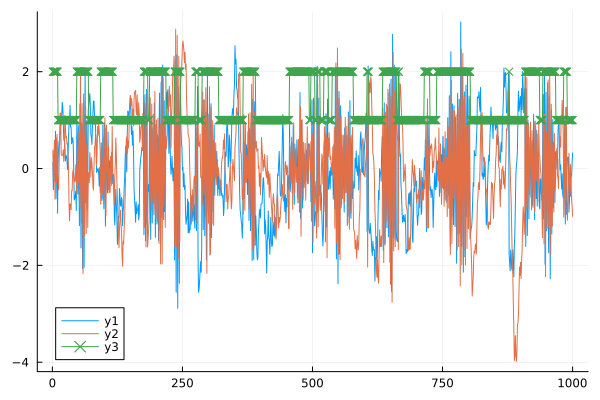

In [4]:
plot(x')
plot!(z, marker=:x)

In [5]:
#using ForwardDiff

#w = exp.(zeros(size(x)...))

#all(isapprox.(ForwardDiff.gradient(x-> StateSpaceDynamics.loglikelihood(x, model.B[1], y, w[1,:]), x),
#    StateSpaceDynamics.Gradient(model.B[1], y, x, w[1,:])))

In [6]:
#all(isapprox.(ForwardDiff.hessian(x-> StateSpaceDynamics.loglikelihood(x, model.B[1], y, w[1,:]), x),
#   Matrix(StateSpaceDynamics.Hessian(model.B[1], y, x, w[1,:])[1])))

Fit and get back posteriors

In [7]:
using LinearAlgebra

p = model.B[1].obs_dim
d = model.B[1].latent_dim

K = model.K
A = rand(K, K)
A ./= sum(A, dims=2) # Normalize rows to sum to 1

πₖ = rand(K)
πₖ ./= sum(πₖ) # Normalize to sum to 1

Q = Matrix(0.5 * I(d))

x0 = [0.0; 0.0]
P0 = Matrix(0.5 * I(d))

# set up the observation parameters
C = randn(p, d)
R = Matrix(0.5 * I(p))

B = [StateSpaceDynamics.LinearDynamicalSystem(
    StateSpaceDynamics.GaussianStateModel(0.95 * [cos(f) -sin(f); sin(f) cos(f)], Q, x0, P0),
    StateSpaceDynamics.GaussianObservationModel(C, R),
    d, p, fill(true, 6  )) for (i,f) in zip(1:K, [0.5, 0.5])]

modeli = SwitchingLinearDynamicalSystem(A, B, πₖ, model.K)

SwitchingLinearDynamicalSystem([0.954138974915903 0.04586102508409695; 0.8845992124331765 0.11540078756682351], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.8337034337958541 -0.45545426167399283; 0.45545426167399283 0.8337034337958541], [0.5 0.0; 0.0 0.5], [0.0, 0.0], [0.5 0.0; 0.0 0.5]), StateSpaceDynamics.GaussianObservationModel{Float64}([-2.3114219965706413 -1.3145381337792914; -0.33259642172623743 0.3711950932577804; … ; 1.692488588090618 1.372914975753027; 1.538173625787169 -1.2002750049480275], [0.5 0.0 … 0.0 0.0; 0.0 0.5 … 0.0 0.0; … ; 0.0 0.0 … 0.5 0.0; 0.0 0.0 … 0.0 0.5]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}

In [8]:
mls, param_diff, FB, FS = fit!(modeli, y; max_iter=100)

Fitting SLDS via vEM... 100%|██████████████████████████████████████████████████| Time: 0:00:45 ( 0.45  s/it)


([-70623.33328853818, -45997.503580185774, -45383.28116678284, -48469.18099398607, -51210.954839150785, -52851.74600691563, -53905.16445304966, -54510.47777956868, -54987.84282064415, -55276.043003810955  …  -57600.8372066505, -57604.10517947973, -57621.18730635922, -57634.92043799456, -57635.74116056482, -57634.175091750156, -57631.95023539467, -57629.56478218978, -57627.17755209594, -57624.8446076447], [5.495444065952347, 5.686215718831547, 0.6641682593365275, 0.1629767191083108, 0.12509541468723984, 0.09766440207156027, 0.08895524493292649, 0.09067635344992805, 0.09700603398456094, 0.10377947378942128  …  0.017315111836414005, 0.016477118484396265, 0.015907569611472005, 0.015079798088648485, 0.014231382907409688, 0.013405278215811925, 0.012597899250804769, 0.011821301853942333, 0.011081383870898126, 0.010379866368721517], StateSpaceDynamics.ForwardBackward{Float64}([-3.235019427243195 -29.238171695554488 … -3.976475729927074 -6.805928612282861; -2.4821774348489725 -6.166680106424867

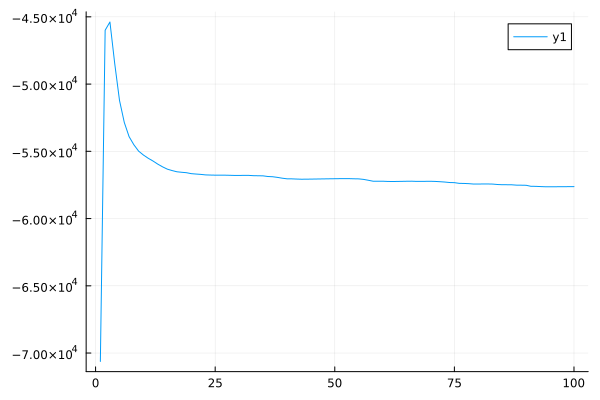

In [9]:
plot(mls)

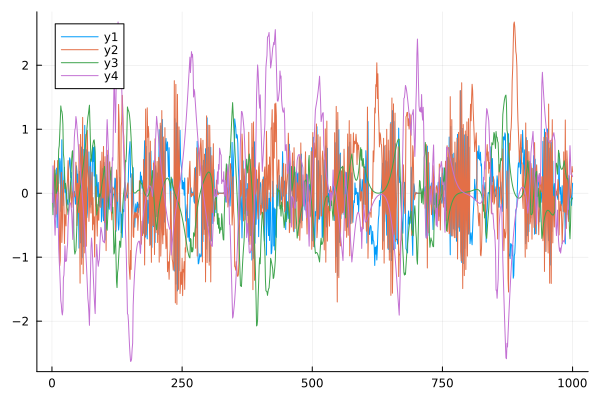

In [10]:
plot(FS[1].x_smooth')
plot!(FS[2].x_smooth')

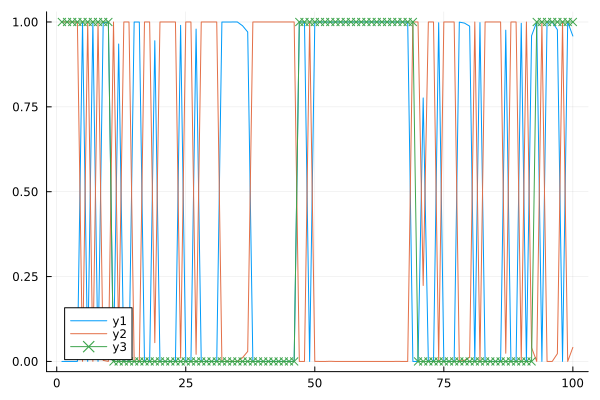

In [17]:
plot(exp.(FB.γ[:,1:100])')
plot!(z[1:100] .- 1, marker=:x)

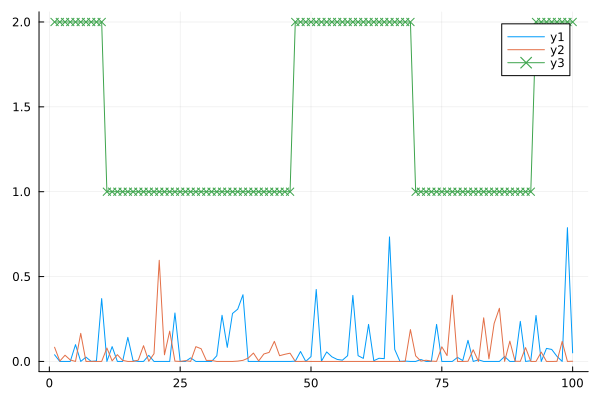

In [18]:
plot(exp.(FB.loglikelihoods[:,1:100])')
plot!(z[1:100], marker=:x)